# Solution to Smart Beta Factors

# 1. READING

1. Describe how each of the factors (other than MKT) is measured. That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

<span style="color: lightblue;">

The factors are constructed using:

- Size Factor (Small minus Big -- SMB): Small cap minus big cap. Split stocks into 5 quantiles, long smallest quantile and short largest quantile (by market cap).
- Value Factor (High minus Low -- HML): High book-to-market ratio minus low book-to-market ratio. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by book-to-market ratio).
- Quality Factor (Robust minus Weak -- RMW): Robust operating profitability minus weak operating profitability. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by operating profitability).
- Investment Factor (Conservative minus Aggressive -- CMA): Conservative investment minus aggressive investment. Split stocks into 5 quantiles, long lowest quantile and short lowest highest (by investment).
- Momentum (Up minus Down -- UMD): Up minus down. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by returns in previous year).

</span>

2. Is the factor portfolio...

* long-only
* long-short
* value-weighted
* equally-weighted

<span style="color: lightblue;">

Long Short.

</span>

4. What steps are taken in the factor construction to try to reduce the correlation between the factors?

<span style="color: lightblue;">

Picking distinct metrics, going long-short (to represent low correlation with the market which is long only).

</span>

5. What is the point of figures 1-6?

<span style="color: lightblue;">

Showing the difference in returns between the highest and lowest quantiles for the factors.

</span>

6. How is a “smart beta” ETF different from a traditional ETF?

<span style="color: lightblue;">

From Page 9 of the case:

Smart beta ETFs are a combination of passive and active investing. Whereas a passive ETF tracks an index, and is almost always long-only, a smart beta ETF will track a factor index, and will thus be long-short. This is compared to just market cap weighted ETFs (passive).

</span>

7. Is it possible for all investors to have exposure to the “value” factor?

<span style="color: lightblue;">

Not everyone can invest in the value factor simultaneously.

However, we can all invest in the market factor: the market, by definition, represents the portfolio of all investors combined.

Factors such as momentum, value, and size involve tilting away from the market by going long in certain stocks and shorting others. We cannot all be short certain stocks since the net buys and sells must equal the total shares outstanding.

In contrast, being long the market doesn't require anyone to be short the market for it to make sense. We can all be long the market!

Thus, not everyone can be a momentum or value investor. Whatever premium is gained from these factors must be sustained by someone taking the opposite position.

</span>

8. How does factor investing differ from traditional diversification? 

<span style="color: lightblue;">

A factor investor believes that all risk-premium is related to a limited set of factors. Therefore, they see no reason to invest in particular assets, but only in the factors themselves.

Traditional diversification is done using assets. Factors investors can also use MV optimization and aim to diversify. Nonetheless, they will do it with factors (instead of individual stocks, bonds, currencies, etc...).

</span>

#### Footnote:

If you need more info in how these factor portfolios are created, see Ken French’s website, and the follow- details: 

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/f-f_5_factors_2x3.html

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/Data_Library/det_mom_factor.html

***

# 2. The Factors

### Data

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

### 1. 
Analyze the factors, similar to how you analyzed the three Fama-French factors in `Homework 4`.

You now have three additional factors, so let’s compare there univariate statistics. 

* mean
* volatility    
* Sharpe

<span style="color: lightblue;">
RMW and MKT have the best Sharpe in the sample of ~0.55.

MKT has the best annualized excess return, averaging 8% per year.
</span>

In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
from matplotlib.ticker import PercentFormatter
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
#current_dir = os.getcwd()
#parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
#sys.path.insert(0, parent_dir)


import cmds.portfolio_management_helper as pmh

EXCEL_PATH = "../data/factor_pricing_data_monthly.xlsx"
FACTORS_SHEET_NUMBER = 1
FACTORS_DESCRIPTION_SHEET_NUMBER = 0
PORTFOLIOS_SHEET_NUMBER = 2

factors_excess_returns = pmh.read_excel_default(EXCEL_PATH, sheet_name=FACTORS_SHEET_NUMBER)
factors_excess_returns.tail(3)

,MKT,SMB,HML,RMW,CMA,UMD
date,,,,,,
2025-06-30,0.0486,-0.0002,-0.0160,-0.0319,0.0145,-0.0264
2025-07-31,0.0198,-0.0015,-0.0127,-0.0029,-0.0207,-0.0096
2025-08-31,0.0185,0.0488,0.0441,-0.0069,0.0207,-0.0354


In [2]:
pmh.read_excel_default(EXCEL_PATH, sheet_name=FACTORS_DESCRIPTION_SHEET_NUMBER)

,Name,Unit,Construction,Description
MKT,Market,Excess Return,Market-cap-weighted,US Equities
SMB,Size,Excess Return,Small Minus Big,Long small stocks and short big stocks
HML,Value,Excess Return,High Minus Low,Long value (high book-to-market) stocks and sh...
RMW,Profitability,Excess Return,Robust Minus Weak,Long profitability (income statement) and shor...
CMA,Investment,Excess Return,Conservative Minus Agressive,Long stocks with low (conservative) investment...
UMD,Momentum,Excess Return,Up Minus Down,Long stocks that have high recent returns and ...
RF,Risk-free rate,Total Return,Tbills,NaN


In [3]:
(
    pmh.calc_summary_statistics(
        factors_excess_returns,
        annual_factor=12,
        provided_excess_returns=True,
        keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
    )
    .sort_values('Annualized Sharpe', ascending=False)
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
MKT,0.0876,0.1561,0.5607
RMW,0.0440,0.0829,0.5311
UMD,0.0603,0.1534,0.3933
CMA,0.0283,0.0725,0.3903
HML,0.0260,0.1088,0.2392
SMB,0.0061,0.1013,0.0604


In [4]:
pmh.calc_summary_statistics(
    factors_excess_returns,
    annual_factor=12,
    provided_excess_returns=True,
    timeframes={
        "1980-2001": ["1980", "2001"],
        "2002-2025": ["2002", "2025"],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
MKT 1980-2001,0.0835,0.1592,0.5242
SMB 1980-2001,0.0028,0.1092,0.0257
HML 1980-2001,0.0528,0.1110,0.4751
RMW 1980-2001,0.0487,0.0912,0.5341
CMA 1980-2001,0.0460,0.0772,0.5958
UMD 1980-2001,0.1088,0.1497,0.7272
MKT 2002-2025,0.0914,0.1535,0.5952
SMB 2002-2025,0.0092,0.0935,0.0984
HML 2002-2025,0.0012,0.1064,0.0113
RMW 2002-2025,0.0397,0.0745,0.5326


### 2. 

Based on the factor statistics above, answer the following.
* Does each factor have a positive risk premium (positive expected excess return)? 
* How have the factors performed since the time of the case, (2015-present)?

<span style="color: lightblue;">
All factors have positive risk-premium in the entire sample.

The same is true in the subsamples specified in HW4 (from 1980 to 2001 and 2002 to 2024). Nonetheless, from 2015 to 2024 HML (Value Factor) and SMB (Size Factor) had negative risk premium.
</span>

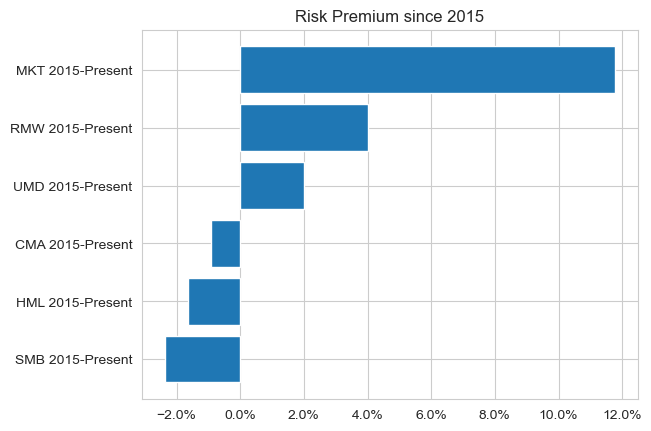

In [5]:
factors_recent_statistics = pmh.calc_summary_statistics(
    factors_excess_returns,
    annual_factor=12,
    provided_excess_returns=True,
    timeframes={
        "2015-Present": ["2015", None],
    },
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
)
factors_recent_statistics.sort_values("Annualized Mean", inplace=True)
plt.barh(factors_recent_statistics.index, factors_recent_statistics['Annualized Mean'])
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.title('Risk Premium since 2015')
plt.show();

In [6]:
factors_recent_statistics.sort_values("Annualized Mean", ascending=False)

,Annualized Mean,Annualized Vol,Annualized Sharpe
MKT 2015-Present,0.1179,0.1574,0.7491
RMW 2015-Present,0.0400,0.0726,0.5509
UMD 2015-Present,0.0201,0.1374,0.1464
CMA 2015-Present,-0.0091,0.0821,-0.1114
HML 2015-Present,-0.0163,0.1299,-0.1255
SMB 2015-Present,-0.0238,0.1032,-0.2305


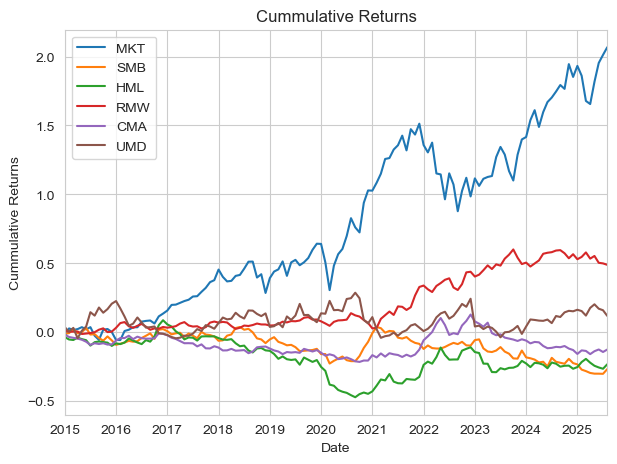

In [7]:
pmh.calc_cummulative_returns(factors_excess_returns.loc["2015":])

### 3. 

Report the correlation matrix across the six factors.
* Does the construction method succeed in keeping correlations small?
* Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

<span style="color: lightblue;">
The correlation between the factors is quite small. We can say that the construction method was successful.

Fama and French correctly mentioned that HML is relatively redundant for the FF5: the correlation with CMA (Investment factor) is almost 70% and the correlation with RMW is 22%.

Nonetheless, one should be careful to drop HML. Prior to doing that, it is necessary to check the cross-sectional test with and without the Value factor and calculate the weights of the tangency portfolio. If HML shows relevant results, it should not be dropped and, thus, is not redundant.

</span>

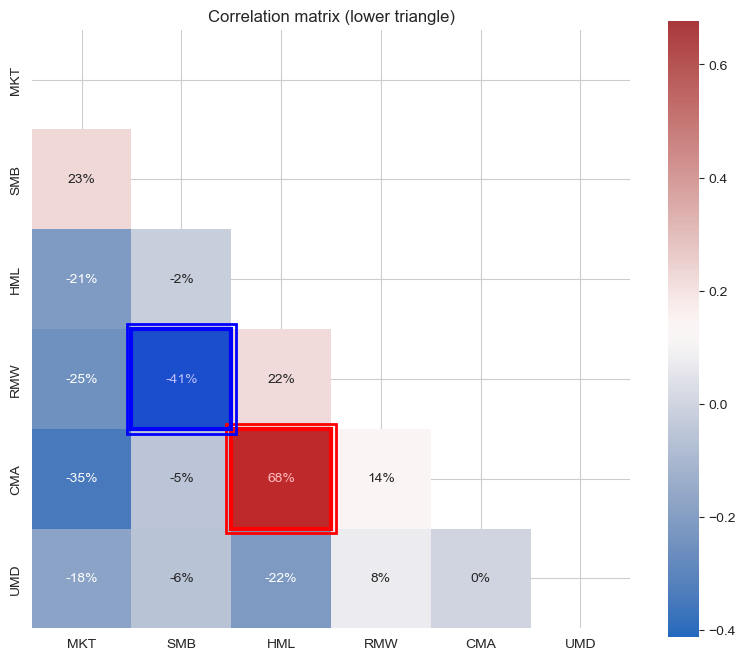

In [8]:
from cmds.plot_tools import plot_corr_matrix
plot_corr_matrix(factors_excess_returns,triangle='lower')
plt.show()

### 4. 

Report the tangency weights for a portfolio of these 6 factors.
* Which factors seem most important? And Least?
* Are the factors with low mean returns still useful?
* Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

What do you conclude about the importance or unimportance of these styles?

<span style="color: lightblue;">
The most important factors are CMA (Investment), RMW (Profitability) and MKT (Market).

SMB and HML (Size and Value are the least important).

RMW has the second third lowest average return, nonetheless, it is among the most important. This happens due to its high Sharpe.

In the graphics above, we can also see that Market is not only weighted more heavily due to its good Sharpe but also due to its average correlation with other factors. While all other factors are long-short, Market is the only factor long-only, making it different from the rest.

Without using the factors of the FF5F, HML becomes drastically important, which agrees with the redundancy previously mentioned. Furthermore, the Sharpe of the tangency portfolio not using CMA and RMW and the tangency portfolio not using HML are statistically the same, pointing out that it is not clear that we should drop Value and prefer Investment and Profitability factors.

</span>

In [9]:
factors_tangency_weights = pd.concat([
    pmh.calc_tangency_weights(factors_excess_returns),
    pmh.calc_summary_statistics(
        factors_excess_returns, annual_factor=12, provided_excess_returns=True,
        keep_columns=["Annualized Sharpe", "Annualized Mean"]
    )
], axis=1)
factors_tangency_weights.sort_values('Tangency Weights', ascending=False)

,Tangency Weights,Annualized Mean,Annualized Sharpe
CMA,0.3214,0.0283,0.3903
RMW,0.3018,0.0440,0.5311
MKT,0.2186,0.0876,0.5607
UMD,0.1125,0.0603,0.3933
SMB,0.0668,0.0061,0.0604
HML,-0.0212,0.0260,0.2392


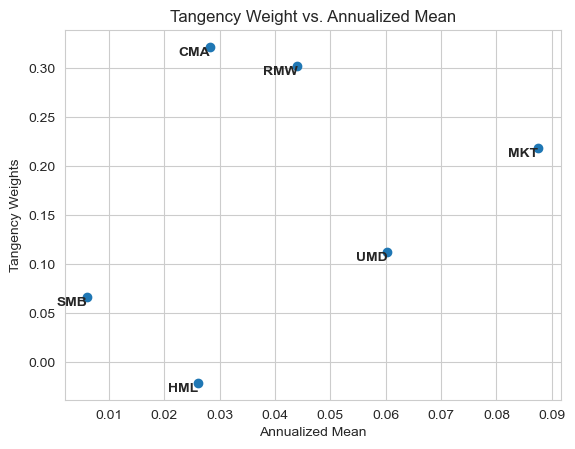

In [10]:
plt.plot(
    factors_tangency_weights['Annualized Mean'],
    factors_tangency_weights['Tangency Weights'],
    marker='o', linestyle=''
)
for i, label in enumerate(factors_tangency_weights.index):
    plt.text(
        factors_tangency_weights['Annualized Mean'][i],
        factors_tangency_weights['Tangency Weights'][i],
        label,
        fontweight='bold',
        ha='right',
        va='top'
    )
plt.xlabel("Annualized Mean")
plt.ylabel("Tangency Weights")
plt.title("Tangency Weight vs. Annualized Mean")
plt.show();

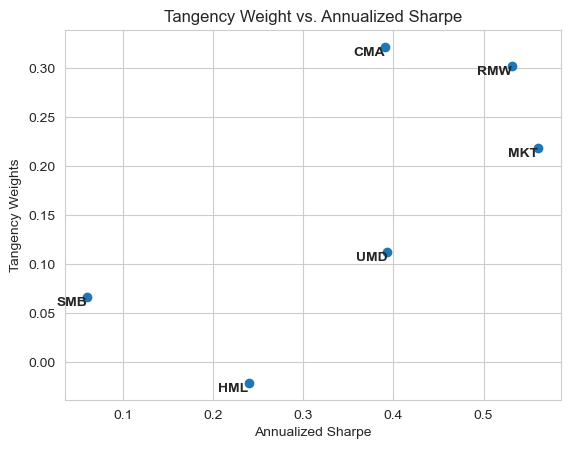

In [11]:
plt.plot(
    factors_tangency_weights['Annualized Sharpe'],
    factors_tangency_weights['Tangency Weights'],
    marker='o', linestyle=''
)
for i, label in enumerate(factors_tangency_weights.index):
    plt.text(
        factors_tangency_weights['Annualized Sharpe'][i],
        factors_tangency_weights['Tangency Weights'][i],
        label,
        fontweight='bold',
        ha='right',
        va='top'
    )
plt.xlabel("Annualized Sharpe")
plt.ylabel("Tangency Weights")
plt.title("Tangency Weight vs. Annualized Sharpe")
plt.show();

In [12]:
factors_tangency_weights_vs_corr = (
    pd.concat([
        pmh.calc_tangency_weights(factors_excess_returns),
        pmh.calc_summary_statistics(
            factors_excess_returns, annual_factor=12, provided_excess_returns=True,
            keep_columns=["Annualized Sharpe", "Annualized Mean", "Corr"]
        )
    ], axis=1)
    .sort_values('Tangency Weights', ascending=False)
    .assign(avg_correlation=lambda df: (
        df.loc[:, [c for c in df.columns if c.endswith('Correlation')]].mean(axis=1)
    ))
    .rename({'avg_correlation': 'Avg Correlation'}, axis=1)
    .pipe(lambda df: pd.concat([df.iloc[:, :3], df["Avg Correlation"], df.iloc[:, 3:-1]], axis=1))
)
factors_tangency_weights_vs_corr.style.format('{:.1%}')

,Tangency Weights,Annualized Mean,Annualized Sharpe,Avg Correlation,MKT Correlation,SMB Correlation,HML Correlation,RMW Correlation,CMA Correlation,UMD Correlation
CMA,32.1%,2.8%,39.0%,23.6%,-34.7%,-5.1%,67.7%,13.9%,100.0%,0.0%
RMW,30.2%,4.4%,53.1%,12.9%,-25.1%,-41.2%,21.9%,100.0%,13.9%,7.7%
MKT,21.9%,8.8%,56.1%,4.0%,100.0%,22.7%,-20.8%,-25.1%,-34.7%,-17.9%
UMD,11.2%,6.0%,39.3%,10.3%,-17.9%,-6.1%,-21.6%,7.7%,0.0%,100.0%
SMB,6.7%,0.6%,6.0%,11.4%,22.7%,100.0%,-2.2%,-41.2%,-5.1%,-6.1%
HML,-2.1%,2.6%,23.9%,24.2%,-20.8%,-2.2%,100.0%,21.9%,67.7%,-21.6%


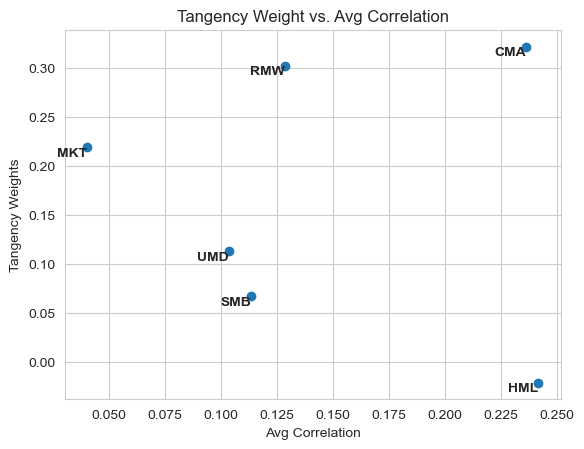

In [13]:
plt.plot(
    factors_tangency_weights_vs_corr['Avg Correlation'],
    factors_tangency_weights_vs_corr['Tangency Weights'],
    marker='o', linestyle=''
)
for i, label in enumerate(factors_tangency_weights_vs_corr.index):
    plt.text(
        factors_tangency_weights_vs_corr['Avg Correlation'][i],
        factors_tangency_weights_vs_corr['Tangency Weights'][i],
        label,
        fontweight='bold',
        ha='right',
        va='top'
    )
plt.xlabel("Avg Correlation")
plt.ylabel("Tangency Weights")
plt.title("Tangency Weight vs. Avg Correlation")
plt.show();

In [14]:
(
    pd.concat([
        pmh.calc_tangency_weights(factors_excess_returns.loc[:, ['MKT', 'SMB', 'HML', 'UMD']]),
        pmh.calc_tangency_weights(factors_excess_returns),
    ], axis=1)
    .set_axis(["Tangency Weights with 4 Factors", "Tangency Weights with 6 Factors"], axis=1)
)

,Tangency Weights with 4 Factors,Tangency Weights with 6 Factors
MKT,0.3765,0.2186
SMB,-0.0512,0.0668
HML,0.3653,-0.0212
UMD,0.3094,0.1125
RMW,NaN,0.3018
CMA,NaN,0.3214


In [15]:
pmh.calc_summary_statistics(
    returns=[
        pmh.calc_tangency_weights(
            factors_excess_returns.loc[:, ['MKT', 'SMB', 'HML', 'UMD']], return_port_ret=True,
            name="Tangency Portfolio with 4 Factors"
        ),
        pmh.calc_tangency_weights(
            factors_excess_returns, return_port_ret=True,
            name="Tangency Portfolio with 6 Factors"
        ),
        pmh.calc_tangency_weights(
            factors_excess_returns.drop('HML', axis=1), return_port_ret=True,
            name="Tangency Portfolio without HML"
        ),
    ],
    annual_factor=12,
    provided_excess_returns=True,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio with 4 Factors Portfolio,0.0608,0.0666,0.9138
Tangency Portfolio with 6 Factors Portfolio,0.0482,0.0401,1.2013
Tangency Portfolio without HML Portfolio,0.0482,0.0402,1.2003


***

# 3. Testing Modern LPMs

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* Fama-French 5F: MKT, SMB, HML, RMW, CMA
* AQR: MKT, HML, RMW, UMD

We are not saying this is “the” AQR model, but it is a good illustration of their most publicized factors: value, momentum, and more recently, profitability.

For instance, for the AQR model is...

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the AQR model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

In [16]:
portfolios_excess_returns = pmh.read_excel_default(EXCEL_PATH, sheet_name=PORTFOLIOS_SHEET_NUMBER)
portfolios_excess_returns.tail()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
date,,,,,,,,,,,,,,,,,,,,,
2025-04-30,-0.0103,-0.0214,0.0116,-0.0616,0.0483,-0.0671,0.1377,0.0164,-0.0383,-0.0801,...,-0.0179,-0.0308,0.0163,0.0097,-0.0299,-0.0245,-0.0851,-0.0792,-0.0054,-0.0030
2025-05-31,0.1264,-0.0326,-0.0009,-0.0382,0.0424,0.0517,0.0615,0.0380,0.0372,0.0989,...,0.0211,0.0689,0.0200,0.0609,0.0330,0.0706,-0.0499,0.0089,0.0752,0.0009
2025-06-30,0.0500,-0.0170,-0.0117,-0.0201,0.0041,0.0627,0.0992,0.0327,-0.0425,0.0167,...,0.0143,0.0441,0.0121,0.0241,0.0162,0.0616,-0.0028,0.1014,0.0819,-0.0192
2025-07-31,-0.0228,-0.0072,-0.0446,0.0304,-0.0618,0.0147,-0.0908,-0.0367,-0.0344,0.0216,...,-0.0076,-0.0239,-0.0020,0.0278,-0.0285,0.0048,-0.1008,0.1033,0.0415,-0.0266
2025-08-31,0.0243,-0.0025,0.0305,0.0311,0.0349,0.0651,0.0462,0.0531,0.0289,0.0387,...,0.0161,0.0383,0.0116,0.0047,0.0050,0.0473,0.0711,0.0541,-0.0058,0.0407


1. Test the AQR 4-Factor Model using the time-series test. (We are not doing the cross-sectional regression tests.)
* For each regression, report the estimated α and r-squared.
* Calculate the mean-absolute-error of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?
* Based on your MAE stat, does this seem to support the pricing model or not?

<span style="color: lightblue;">
If the pricing model worked, the alphas should be statistically zero, meaning small.

This should be the case because all risk premium of any asset should be associated with the risk of the pricing factors.

An alpha means that there is positive (or negative) excess return not associated with pricing factors.

In the time-series, the annualized MAE is 2.3%, which does not support the idea that the pricing model is able to capture all systematic risk.

This mean that, on average, assets have taken 2.3% excess return uncorrelated with any of the pricing factors.

</span>

In [17]:
AQR_FACTORS = ['MKT', 'HML', 'RMW', 'UMD']

aqr_time_series_test = pmh.calc_iterative_regression(
    multiple_y=portfolios_excess_returns,
    X=factors_excess_returns[AQR_FACTORS],
    annual_factor=12,
    warnings=False,
    keep_columns=['Alpha', 'Annualized Alpha', 'R-Squared']
)
aqr_time_series_test

,Alpha,Annualized Alpha,R-Squared
Agric,0.0010,0.0117,0.3421
Food,0.0001,0.0015,0.4551
Soda,0.0013,0.0154,0.3025
Beer,0.0008,0.0099,0.4148
Smoke,0.0034,0.0411,0.2654
Toys,-0.0028,-0.0337,0.5102
Fun,0.0033,0.0391,0.6072
Books,-0.0031,-0.0367,0.6889
Hshld,-0.0011,-0.0127,0.5547
Clths,-0.0019,-0.0227,0.6190


In [18]:
pmh.calc_cross_section_regression(
    portfolios_excess_returns,
    factors_excess_returns[AQR_FACTORS],
    annual_factor=12,
    keep_columns=["TS MAE", "TS Annualized MAE"],
    provided_excess_returns=True,
)

Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns


,TS MAE,TS Annualized MAE
MKT + HML + RMW + UMD Cross-Section Regression,0.0021,0.0246


In [19]:
aqr_mae = aqr_time_series_test['Alpha'].abs().mean()
aqr_annualized_mae = aqr_time_series_test['Annualized Alpha'].abs().mean()
print(f"AQR Time-Series Average Absolute Alpha: {aqr_mae:.4f}")
print(f"AQR Time-Series Average Absolute Annualized Alpha: {aqr_annualized_mae:.4f}")

AQR Time-Series Average Absolute Alpha: 0.0021
AQR Time-Series Average Absolute Annualized Alpha: 0.0246


2. Test the CAPM, FF 3-Factor Model and the the FF 5-Factor Model.
   * Report the MAE statistic for each of these models and compare it with the AQR Model MAE.
   * Which model fits best?

<span style="color: lightblue;">
The model with the smallest time-series MAE is the CAPM (2.04% annualized).

The model able to explain the biggest percentage of the cross-section is the FF5F (41%), followed by the FF3 (37%) and the AQR (22%).

</span>

In [20]:
FACTOR_MODELS = {
    'CAPM': ['MKT'],
    'AQR': AQR_FACTORS,
    'FF3': ['MKT', 'HML', 'SMB'],
    'FF5': ['MKT', 'HML', 'SMB', 'RMW', 'CMA'],
    # 'All Factors': ['MKT', 'HML', 'SMB', 'RMW', 'CMA', 'UMD'],
}

cross_sectional_tests = pd.DataFrame({})
for name, factors in FACTOR_MODELS.items():
    cross_sectional_test = pmh.calc_cross_section_regression(
        portfolios_excess_returns,
        factors_excess_returns[factors],
        annual_factor=12,
        name=name,
        provided_excess_returns=True,
    )
    cross_sectional_tests = pd.concat([cross_sectional_tests, cross_sectional_test])
(
    cross_sectional_tests
    .loc[:, lambda df: [c for c in df.columns if c.endswith('Eta') or c.endswith('MAE') or c == 'R-Squared']]
    .sort_values('R-Squared', ascending=False)
)

Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns
Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns
Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns
Lambda represents the premium calculated by the cross-section regression and the historical premium is the average of the factor excess returns


,Eta,Annualized Eta,R-Squared,TS MAE,TS Annualized MAE,CS MAE,CS Annualized MAE
FF5 Cross-Section Regression,0.0050,0.0599,0.3765,0.0026,0.0314,0.0010,0.0120
FF3 Cross-Section Regression,0.0052,0.0627,0.3504,0.0020,0.0244,0.0010,0.0120
AQR Cross-Section Regression,0.0063,0.0755,0.2066,0.0021,0.0246,0.0011,0.0136
CAPM Cross-Section Regression,0.0069,0.0832,0.0093,0.0017,0.0210,0.0013,0.0152


3. Does any particular factor seem especially important or unimportant for pricing? Do you think Fama and French should use the Momentum Factor?

<span style="color: lightblue;">
The SMB factor seems particularly unimportant.

In both factor models in which it is included, it has ~10% of absolute average return.

For the FF3, the addition of momentum is particularly important. For the FF5 is not that important. We can validate that by adding the UMD factor to the FF5 and the FF3.

</span>

In [21]:
factor_models_tangency_weights = pd.DataFrame({})
for name, factors in FACTOR_MODELS.items():
    factor_model_tangency_weights = pmh.calc_tangency_weights(factors_excess_returns[factors], name=name)
    factor_models_tangency_weights = pd.concat([factor_models_tangency_weights, factor_model_tangency_weights], axis=1)
factor_models_tangency_weights

,CAPM Weights,AQR Weights,FF3 Weights,FF5 Weights
MKT,1.0000,0.2765,0.6142,0.2273
HML,NaN,0.1836,0.5019,-0.0989
RMW,NaN,0.3546,NaN,0.3687
UMD,NaN,0.1853,NaN,NaN
SMB,NaN,NaN,-0.1161,0.0806
CMA,NaN,NaN,NaN,0.4223


In [22]:
pd.concat([
    pmh.calc_tangency_weights(factors_excess_returns[FACTOR_MODELS['FF5'] + ['UMD']], name='FF5 + Momentum'),
    pmh.calc_tangency_weights(factors_excess_returns[FACTOR_MODELS['FF3'] + ['UMD']], name='FF3 + Momentum')
], axis=1)

,FF5 + Momentum Weights,FF3 + Momentum Weights
MKT,0.2186,0.3765
HML,-0.0212,0.3653
SMB,0.0668,-0.0512
RMW,0.3018,NaN
CMA,0.3214,NaN
UMD,0.1125,0.3094


4. This does not matter for pricing, but report the average (across $n$ estimations) of the time-series regression r-squared statistics.
   * Do this for each of the three models you tested.
   * Do these models lead to high time-series r-squared stats? That is, would these factors be good in a Linear Factor Decomposition of the assets?

<span style="color: lightblue;">
Not particularly. They only explain about 50-60% of the variation. This indicates moderately low explainability of excess returns by decomposition on different factor models. Thus the factors may not be considered good in a Linear Factor Decomposition of the assets.

The best one is the FF5F, followed by AQR, FF3F and, finally, CAPM. The order of the R-Squared is not surprising at all: the factors with the most features have an "in-sample" better fit.
</span>

In [23]:
factor_model_time_series_tests = pd.DataFrame({})
for name, factors in FACTOR_MODELS.items():
    factor_model_time_series_test = pmh.calc_iterative_regression(
        portfolios_excess_returns,
        factors_excess_returns[factors],
        annual_factor=12,
        warnings=False,
        keep_columns=['R-Squared']
    )
    factor_model_time_series_tests = factor_model_time_series_tests.join(
        factor_model_time_series_test.rename({'R-Squared': f'{name} R-Squared'}, axis=1),
        how='outer'
    )
factor_model_time_series_tests

,CAPM R-Squared,AQR R-Squared,FF3 R-Squared,FF5 R-Squared
Aero,0.5431,0.5994,0.5776,0.5971
Agric,0.3333,0.3421,0.3573,0.3619
Autos,0.4828,0.5278,0.5014,0.5030
Banks,0.6126,0.7740,0.7666,0.7819
Beer,0.3244,0.4148,0.3518,0.4336
BldMt,0.6949,0.7525,0.7492,0.7800
Books,0.6551,0.6889,0.6911,0.7022
Boxes,0.5549,0.5829,0.5683,0.5787
BusSv,0.8439,0.8463,0.8687,0.8736
Chems,0.6845,0.7452,0.7284,0.7461


In [24]:
(
    factor_model_time_series_tests
    .rename(columns=lambda c: c.replace(" R-Squared", ""))
    .mean().to_frame('Avg R-Squared')
    .sort_values('Avg R-Squared', ascending=False)
)

,Avg R-Squared
FF5,0.5918
AQR,0.5719
FF3,0.5679
CAPM,0.5226


5. We tested three models using the time-series tests (focusing on the time-series alphas.) Re-test these models, but this time use the cross-sectional test.
* Report the time-series premia of the factors (just their sample averages,) and compare to the cross-sectionally estimated premia of the factors. Do they differ substantially?
* Report the MAE of the cross-sectional regression residuals for each of the four models. How do they compare to the MAE of the time-series alphas?

<span style="color: lightblue;">
Yes, the time-series and the cross-sectional premia.

For instance:
- MKT estimated premium in the CAPM is 2.5% lower than in reality.
- HML has a negative premium in the cross-section of AQR model and a positive small premium in historical values.
- In the FF5, SMB and HML and CMA have premiums diverging in sign between historical and cross-section methodoly.

The smallest TS MAE is found in the time-series. The smallest CS MAE is found in the FF3 and FF5 models.
</span>

In [25]:
(
    cross_sectional_tests
    .loc[:, lambda df: [
        c for c in df.columns if c.endswith('Annualized Lambda')
        or c.endswith('Annualized Historical Premium')
    ]]
    .transpose()
    .sort_index()
    .reset_index()
    .rename({'index': 'Premium'}, axis=1)
    .assign(Factor=lambda df: df['Premium'].map(lambda x: x[:3]))
    .assign(Premium=lambda df: df['Premium'].map(lambda x: 'Historical' if x.endswith('Historical Premium') else 'Cross-Sectional'))
    .rename(columns=lambda c: c.replace(' Cross-Section Regression', ''))
    .set_index(['Factor', 'Premium']).unstack('Premium')
)

CAPM                        AQR                        FF3  \
Premium Cross-Sectional Historical Cross-Sectional Historical Cross-Sectional   
Factor                                                                          
CMA                 NaN        NaN             NaN        NaN             NaN   
HML                 NaN        NaN         -0.0323     0.0260         -0.0210   
MKT              0.0079     0.0876          0.0172     0.0876          0.0388   
RMW                 NaN        NaN          0.0175     0.0440             NaN   
SMB                 NaN        NaN             NaN        NaN         -0.0396   
UMD                 NaN        NaN          0.0003     0.0603             NaN   

                               FF5             
Premium Historical Cross-Sectional Historical  
Factor                                         
CMA            NaN         -0.0221     0.0283  
HML         0.0260         -0.0259     0.0260  
MKT         0.0876          0.0403     0.0876  
RMW            NaN          0.0187     0.0440  
SMB         0.0061         -0.0414     0.0061  
UMD            NaN             NaN        NaN

In [26]:
cross_sectional_tests

,Eta,Annualized Eta,R-Squared,MKT Lambda,Treynor Ratio,Annualized Treynor Ratio,MKT Annualized Lambda,MKT Historical Premium,MKT Annualized Historical Premium,TS MAE,...,RMW Annualized Historical Premium,UMD Annualized Historical Premium,SMB Lambda,SMB Annualized Lambda,SMB Historical Premium,SMB Annualized Historical Premium,CMA Lambda,CMA Annualized Lambda,CMA Historical Premium,CMA Annualized Historical Premium
CAPM Cross-Section Regression,0.0069,0.0832,0.0093,0.0007,11.5196,138.2352,0.0079,0.0073,0.0876,0.0017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AQR Cross-Section Regression,0.0063,0.0755,0.2066,0.0014,NaN,NaN,0.0172,0.0073,0.0876,0.0021,...,0.0440,0.0603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FF3 Cross-Section Regression,0.0052,0.0627,0.3504,0.0032,NaN,NaN,0.0388,0.0073,0.0876,0.0020,...,NaN,NaN,-0.0033,-0.0396,0.0005,0.0061,NaN,NaN,NaN,NaN
FF5 Cross-Section Regression,0.0050,0.0599,0.3765,0.0034,NaN,NaN,0.0403,0.0073,0.0876,0.0026,...,0.0440,NaN,-0.0035,-0.0414,0.0005,0.0061,-0.0018,-0.0221,0.0024,0.0283


In [27]:
(
    cross_sectional_tests
    .loc[:, lambda df: [
        c for c in df.columns if c.endswith('CS Annualized MAE')
        or c.endswith('TS Annualized MAE')
    ]]
    .rename(index=lambda c: c.replace(' Cross-Section Regression', ''))
)

,TS Annualized MAE,CS Annualized MAE
CAPM,0.0210,0.0152
AQR,0.0246,0.0136
FF3,0.0244,0.0120
FF5,0.0314,0.0120


***